In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train=pd.read_csv("/content/drive/MyDrive/CS 539 Final Project/Data Split/train_preprocessing.csv")
test=pd.read_csv("/content/drive/MyDrive/CS 539 Final Project/Data Split/test_preprocessing.csv")
valid=pd.read_csv("/content/drive/MyDrive/CS 539 Final Project/Data Split/valid_preprocessing.csv")
# fill null values
train['text'].fillna("", inplace = True)
test['text'].fillna("", inplace = True)
valid['text'].fillna("", inplace = True)
train

,id,date,flag,user,text,target
0,1982498874,Sun May 31 11:19:51 PDT 2009,NO_QUERY,Sun_Immaculate,miss cut grass cut grass burn smell smell burn...,0.0
1,2052542788,Sat Jun 06 01:05:28 PDT 2009,NO_QUERY,cookiemonster82,chang vote wont bat today co rain cricketsweep,1.0
2,2072011839,Sun Jun 07 20:15:00 PDT 2009,NO_QUERY,davidallentv,ty link boost even tho didnt copi whole link t...,1.0
3,2266222859,Sun Jun 21 08:07:29 PDT 2009,NO_QUERY,babyyg,whatt feeel,0.0
4,1973430757,Sat May 30 11:07:59 PDT 2009,NO_QUERY,aoitshirts,circl triangl,0.0
...,...,...,...,...,...,...
959995,1692515784,Sun May 03 20:09:50 PDT 2009,NO_QUERY,jgonzalez14,fleuri im get old im not hip anymor haha,0.0
959996,2056733151,Sat Jun 06 11:41:32 PDT 2009,NO_QUERY,cocovelvett,land figur ride back car,0.0
959997,1976861893,Sat May 30 19:20:24 PDT 2009,NO_QUERY,AutismIsARose,get off work return apartmentturn tv saw weath...,1.0
959998,2169479730,Sun Jun 14 14:34:20 PDT 2009,NO_QUERY,sheepeatingtaz,far much wine lose chunk day,0.0


In [25]:
# train test split
X_test=test['text']
y_test=test['target']

# train test split
X_train=train['text']
y_train=train['target']

# train test split
X_val=valid['text']
y_val=valid['target']

In [21]:
tokenizerWords = pd.concat([test,train,valid]).reset_index(drop=True)['text']
tokenizerWords

0                                       alreadi miss go miss
1                                          feat awwwww video
2                feel everybodi stude dont know anyth hahaha
3                                     wanna still sleep cant
4                    hate everyth ive design month ago befor
                                 ...                        
1599995    tweet deck keep crash even start iphon back tw...
1599996       x see learn heyyyyyi need follow follow ya rap
1599997                                        go boy britti
1599998                       th page sketch do time work th
1599999               jen electricut work seem war work late
Name: text, Length: 1600000, dtype: object

In [22]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tokenizerWords)
sequences = tokenizer.texts_to_sequences(tokenizerWords)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   21    3   21]
 [   0    0    0 ...    0 2285  222]
 [   0    0    0 ...   18  257  286]
 ...
 [   0    0    0 ...    0    3  236]
 [   0    0    0 ...   11    7  298]
 [   0    0    0 ... 1089    7  156]]


In [23]:
import pickle
with open('/content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=max_len)

sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=max_len)

sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(sequences, maxlen=max_len)


In [30]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import os

checkpoint_path = "/content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


model = Sequential()
model.add(layers.Embedding(max_words, 128))
model.add(layers.LSTM(64,dropout=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
29997/30000 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.7764
Epoch 1: val_accuracy improved from -inf to 0.78800, saving model to /content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt


30000/30000 [==============================] - 367s 12ms/step - loss: 0.4683 - accuracy: 0.7764 - val_loss: 0.4490 - val_accuracy: 0.7880
Epoch 2/10
29999/30000 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.7903
Epoch 2: val_accuracy improved from 0.78800 to 0.79132, saving model to /content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt


30000/30000 [==============================] - 357s 12ms/step - loss: 0.4461 - accuracy: 0.7903 - val_loss: 0.4439 - val_accuracy: 0.7913
Epoch 3/10
29997/30000 [============================>.] - ETA: 0s - loss: 0.4386 - accuracy: 0.7948
Epoch 3: val_accuracy improved from 0.79132 to 0.79246, saving model to /content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt


30000/30000 [==============================] - 356s 12ms/step - loss: 0.4386 - accuracy: 0.7948 - val_loss: 0.4428 - val_accuracy: 0.7925
Epoch 4/10
29996/30000 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7969
Epoch 4: val_accuracy improved from 0.79246 to 0.79319, saving model to /content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt


30000/30000 [==============================] - 355s 12ms/step - loss: 0.4348 - accuracy: 0.7969 - val_loss: 0.4452 - val_accuracy: 0.7932
Epoch 5/10
29998/30000 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7981
Epoch 5: val_accuracy improved from 0.79319 to 0.79370, saving model to /content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt


30000/30000 [==============================] - 358s 12ms/step - loss: 0.4320 - accuracy: 0.7982 - val_loss: 0.4448 - val_accuracy: 0.7937
Epoch 6/10
29999/30000 [============================>.] - ETA: 0s - loss: 0.4303 - accuracy: 0.7994
Epoch 6: val_accuracy did not improve from 0.79370
30000/30000 [==============================] - 353s 12ms/step - loss: 0.4303 - accuracy: 0.7994 - val_loss: 0.4431 - val_accuracy: 0.7932
Epoch 7/10
29996/30000 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.8006
Epoch 7: val_accuracy improved from 0.79370 to 0.79374, saving model to /content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/cp.ckpt


30000/30000 [==============================] - 356s 12ms/step - loss: 0.4290 - accuracy: 0.8006 - val_loss: 0.4460 - val_accuracy: 0.7937
Epoch 8/10
29999/30000 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.8007
Epoch 8: val_accuracy did not improve from 0.79374
30000/30000 [==============================] - 389s 13ms/step - loss: 0.4285 - accuracy: 0.8007 - val_loss: 0.4445 - val_accuracy: 0.7934
Epoch 9/10
29998/30000 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8011
Epoch 9: val_accuracy did not improve from 0.79374
30000/30000 [==============================] - 356s 12ms/step - loss: 0.4277 - accuracy: 0.8011 - val_loss: 0.4423 - val_accuracy: 0.7935
Epoch 10/10
29995/30000 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.8015
Epoch 10: val_accuracy did not improve from 0.79374
30000/30000 [==============================] - 353s 12ms/step - loss: 0.4271 - accuracy: 0.8015 - val_loss: 0.4448 - val_accuracy: 

In [32]:
import joblib
filename = "/content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/rnn.joblib"
joblib.dump(model, filename)

['/content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/rnn.joblib']

In [33]:
model.save("/content/drive/MyDrive/CS 539 Final Project/Ensemble/RNN/third/rnnSave")

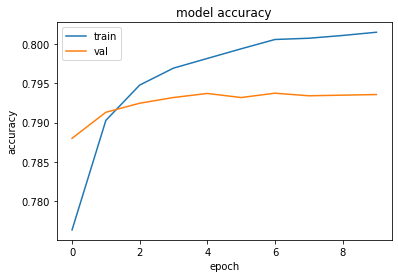

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

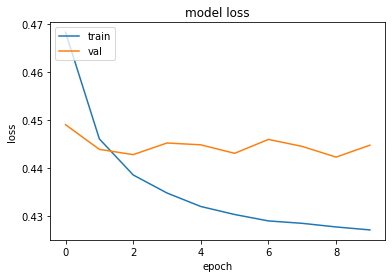

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 57s 6ms/step - loss: 0.4448 - accuracy: 0.7936


[0.44476082921028137, 0.7935656309127808]